<a href="https://colab.research.google.com/github/PrathameshKR/ML-projects/blob/main/ML-models/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

In [ ]:
#Data Collection
wine_data = pd.read_csv('/content/winequality-red.csv')

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#checking no. of rows and columns
wine_data.shape

(1599, 12)

In [ ]:
#checking for missing values
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


#Data analysis and visualization

In [ ]:
#statistical measures of dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Checking distribution of datapoints over quality
wine_data['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


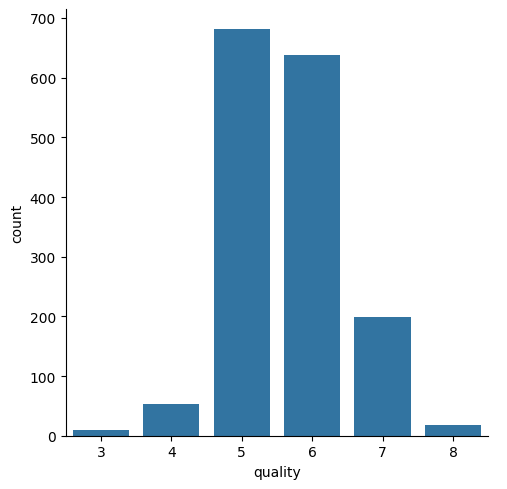

In [ ]:
#visually
sns.catplot(x='quality',data = wine_data,kind = 'count')

<Axes: xlabel='quality', ylabel='citric acid'>

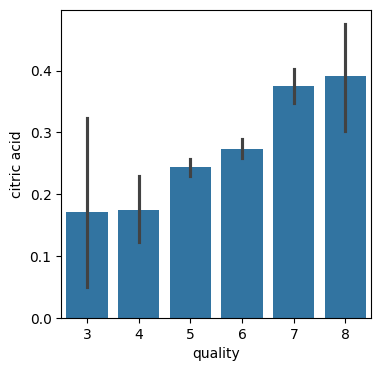

In [ ]:
#checking relation between different attributes
plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='citric acid',data=wine_data,)
#remarks higher the citric acid quantity higher is the quality

<Axes: xlabel='quality', ylabel='volatile acidity'>

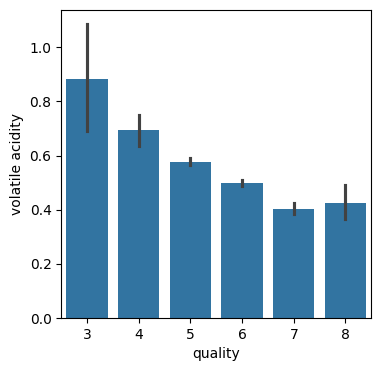

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='volatile acidity',data=wine_data,)
#remarks: quality is reciprocal of volatile acidity

<Axes: xlabel='quality', ylabel='chlorides'>

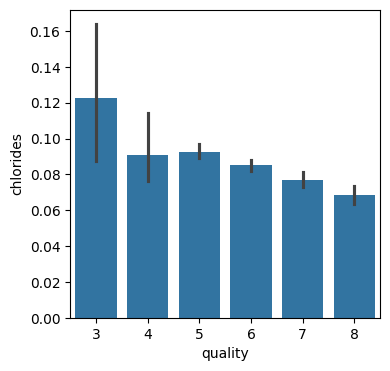

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='chlorides',data=wine_data,)
#remarks:quality is reciprocal of chloride content

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

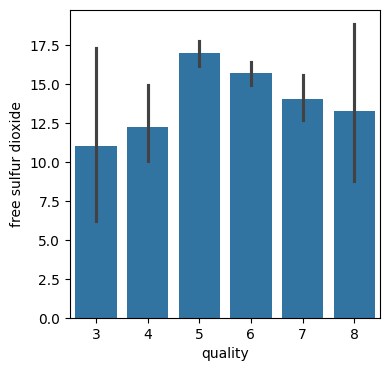

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_data,)
#remarks:no clear linear trend between the attributes

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

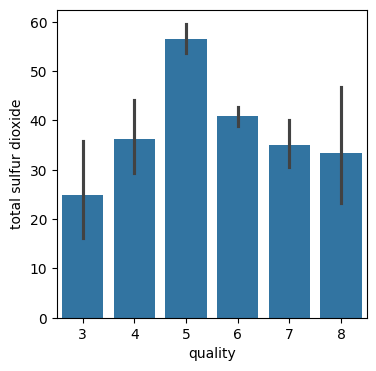

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='total sulfur dioxide',data=wine_data,)
#remarks:no clear linear trend between the attributes

<Axes: xlabel='quality', ylabel='sulphates'>

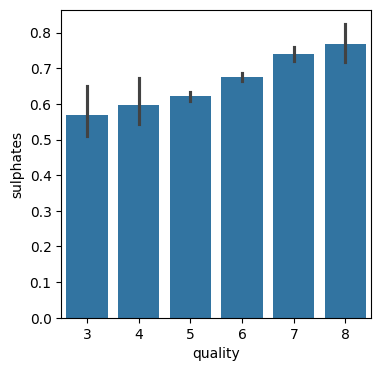

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='sulphates',data=wine_data,)
#remarks:linear relationship between the attributes

<Axes: xlabel='quality', ylabel='alcohol'>

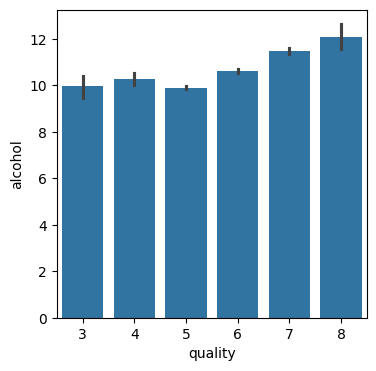

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='alcohol',data=wine_data,)
#remarks:linear relationship between attributes

In [ ]:
#checking correlation between all attributes
correlation = wine_data.corr()

<Axes: >

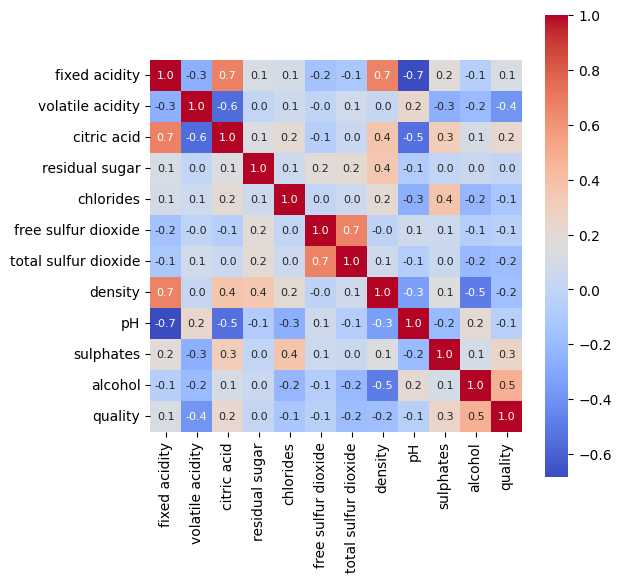

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cmap='coolwarm',cbar=True,square=True,annot=True,annot_kws={'size':8},fmt='.1f')

##Data Preprocessing

In [ ]:
#separating data and label
X = wine_data.drop(['quality','fixed acidity','residual sugar','density','pH'],axis=1)

In [ ]:
print(X)

      volatile acidity  citric acid  chlorides  ...  total sulfur dioxide  sulphates  alcohol
0                0.700         0.00      0.076  ...                  34.0       0.56      9.4
1                0.880         0.00      0.098  ...                  67.0       0.68      9.8
2                0.760         0.04      0.092  ...                  54.0       0.65      9.8
3                0.280         0.56      0.075  ...                  60.0       0.58      9.8
4                0.700         0.00      0.076  ...                  34.0       0.56      9.4
...                ...          ...        ...  ...                   ...        ...      ...
1594             0.600         0.08      0.090  ...                  44.0       0.58     10.5
1595             0.550         0.10      0.062  ...                  51.0       0.76     11.2
1596             0.510         0.13      0.076  ...                  40.0       0.75     11.0
1597             0.645         0.12      0.075  ...         

##Label binarization

In [ ]:
Y = wine_data['quality'].apply(lambda y_value: 1 if y_value>7 else 0)

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
#Splitting data into train and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
#Loading Model
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
#Model Evaluation
train_set_prediction = model.predict(X_train)
training_accuracy = accuracy_score(train_set_prediction,Y_train)
print("Training Accuracy: ",training_accuracy)

Training Accuracy:  1.0


In [ ]:
test_set_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(test_set_prediction,Y_test)
print("Testing Accuracy: ",testing_accuracy)

Testing Accuracy:  0.990625


In [ ]:
#creating a predictive system
input = []